In [1]:
import sys
sys.path.append("../")

import glob
from Fast_MSS import *
from MLC_utils import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Labels as Moorea Labeled Coral (MLC) dataset, included 'Off' for semantic segmentation
# http://vision.ucsd.edu/content/moorea-labeled-corals
labels = ['Acrop', 'CCA', 'Macro', 'Monti', 'Off', 'Pavon', 'Pocill', 'Porit', 'Sand', 'Turf']

In [3]:
image_file = "MLC\\images\\mcr_lter4_out10m_pole3-4_qu1_20080407.jpg"
image = io.imread(image_file)

# concatenates all labels (original and those provide by CNN)
label_file = image_file.replace("images", "labels") + ".txt"
sparse = get_sparse_points(image_file, label_file, labels, confidence = .75)

In [4]:
# Create a mask using all of the sparse labels via fast_mss
# Note that the start_iter, end_iter, and num_iter are hueristics so try
# different values for different datasets

mask = fast_mss(image, sparse, labels, 
                start_iter = 2500, end_iter = 100, num_iter = 20, method = 'mode')  

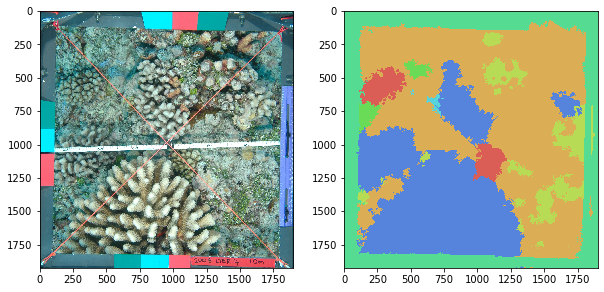

In [5]:
# Show the last sample
display(image, colorize_prediction(mask, labels))